# 0. Setup

In [1]:
! pip3 install imblearn seaborn pandas numpy matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('datasets/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

# 1. Normalizando

Nessa seção, vamos normalizar as colunas numéricas do dataset que não estão entre 0 e 1

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [5]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Aqui eu seleciona as colunas de dados contínuos
# numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# # Normaliza os dados usando Min-Max Scaling
# scaler = MinMaxScaler()
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# # Visualizar o dataset normalizado
# df.head()

Corrigindo o nome das colunas

In [6]:
df.rename(columns=lambda x: x.strip() if x.startswith(' ') else x, inplace=True)

In [7]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

# 2. Retirando Dados Que Não Serão Utilizados

Retiraremos a coluna *Net Income Flag* que possui apenas um valor

In [8]:
df = df.drop(columns= ['Net Income Flag', 'Liability-Assets Flag'])
print(df.shape[1])

94


# 3. Tratando Nulos e Duplicatas

Não há nulos nem duplicatas nesse dataset

In [9]:
duplicatas = df.duplicated()
# Contar o número de duplicatas
num_duplicatas = duplicatas.sum()
print("Número total de duplicatas:", num_duplicatas)

Número total de duplicatas: 0


In [10]:
valores_nulos = df.isnull().sum()
colunas_com_nulos = valores_nulos[valores_nulos > 0].index.tolist()

# Imprimir as colunas que têm valores nulos
print("Colunas com valores nulos:")
print(colunas_com_nulos)

Colunas com valores nulos:
[]


# 4. Formatando os Dados

Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
numeric_columns = df.select_dtypes(include=['float64']).columns

# Aplicar padronização (StandardScaler) às colunas numéricas
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,-0.616334,-0.750713,-0.545256,-0.151921,-0.829388,-1.279247,-1.275228,-1.276147,-1.794106,-0.671081,-0.025697,-0.471371,-1.375150,-0.025299,0.019997,-0.012031,-0.012262,-0.010299,-0.182259,-0.013721,-0.119118,-0.769297,-0.012111,-0.034237,-0.092520,-0.026226,1.750845,-1.750845,-0.133505,0.959784,0.041865,-0.471275,-1.460495,-0.332027,-0.540344,-0.045967,-0.038333,-0.661726,-0.407123,-0.155185,-0.017024,-0.237123,-0.038222,-2.393729,-1.155833,-1.520572,-0.861820,-0.020937,-0.072818,1.126267,-0.563752,-0.045371,-0.095887,-0.412896,-1.245334,0.568487,-0.094979,-1.232594,-0.043610,1.314027,-0.175421,1.299751,-0.019619,-0.685397,0.003948,-0.012111,-0.412896,0.568487,0.558428,-0.257031,-0.108218,-1.247231,-0.206594,2.812493,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067
1,1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,-0.616334,-0.750713,-0.326632,-0.151921,-0.829388,-0.251878,-0.250429,-0.251550,-0.597379,-0.303533,-0.025697,-0.550058,-0.435312,-0.027130,0.010035,0.039473,0.039663,-0.001930,0.207732,-0.013721,0.027847,-0.143117,-0.012111,-0.034237,0.372093,-0.026226,1.075727,-1.075727,-0.132282,0.129305,-0.010932,-0.548362,-0.446793,-0.355356,-0.762702,-0.045967,-

In [12]:
df.to_csv("datasets/data_normalizada.csv", index=False)

Usando PCA para redução de dimensionalidade

In [13]:
# from sklearn.decomposition import PCA

# # Aplicar PCA para reduzir a dimensionalidade para 10 componentes principais
# pca = PCA(n_components=10)
# pca_result = pca.fit_transform(df)

# pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

# pca_df.head()

In [14]:
# sns.pairplot(pca_df)
# plt.suptitle('Matriz de Dispersão dos Componentes Principais (PCA)', y=1.02)
# plt.show()

# 5. Balanceando o Dataset

Para balancear o Dataset, iremos testar as técnicas de Over-sampling e Under-sampling. 

Para o Over-sampling, utilizaremos a técnica de SMOTE (Synthetic Minority Over-sampling TEchnique), que gera novos dados calculando a diferença entre uma amostra e seu vizinho mais próximo, multiplica a diferença por um número aleatório entre 0 e 1 e adiciona esse valor na amostra para gerar um novo exemplo. Essa técnina adicionará novos dados apenas na classe majoritária por causa da definição do parâmetro *sampling_strategy*. 

Para o Under-sampling, utilizaremos a técnica de RandomUnderSampler, que deleta aleatoriamente linhas cuja classe são a classe marjoritária. Essa técnina adicionará novos dados apenas na classe minoritária por causa da definição do parâmetro *sampling_strategy*. 

## 5.1 Over-sampling: SMOTE

In [15]:
X, y = df.iloc[:, 1:], df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [16]:
df_test = pd.concat([y_test, X_test], axis=1)

In [17]:
sm = SMOTE(sampling_strategy='not majority', random_state=42)

In [18]:
X_res, y_res = sm.fit_resample(X_train, y_train)

In [19]:
df_smote = pd.concat([y_res, X_res], axis=1)
df_smote.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0,0.600320,0.543004,0.636724,0.354261,0.357434,0.024068,0.026604,0.026736,-0.005091,0.026053,-0.616334,-0.750713,0.142329,-0.151921,-0.507442,-0.015860,-0.015002,-0.016170,0.298035,0.451647,-0.025697,0.166864,0.179896,-0.029473,-0.000229,0.011576,0.010910,-0.005681,0.739223,-0.013721,-0.082175,0.404004,-0.012111,-0.034237,-0.028768,-0.026226,-0.179186,0.179186,-0.123263,-0.216952,-0.049430,0.170628,0.210962,-0.157964,0.230497,-0.045967,-0.038333,-0.661726,-0.407123,-0.062837,-0.017024,-0.178719,-0.038222,-0.303652,-0.204929,-0.174255,0.227562,-0.020937,-0.072818,0.167686,0.277726,0.000147,-0.095887,0.671810,-0.085210,-0.089285,-0.094979,0.487761,-0.014062,0.416142,-0.423919,2.037595,-0.006750,-0.841264,0.007746,-0.012111,0.671810,-0.089285,-0.241268,1.046512,0.371875,0.836227,0.546459,0.010797,0.582531,-0.049491,-0.012357,0.354085,0.148618,-0.139151,-0.046810,-0.009201,-0.219559
1,0,-2.217106,-1.888775,-2.231731,-0.784691,-0.784416,0.013489,-0.008444,-0.003813,-0.049890,-0.010037,1.091803,-0.704910,-0.152913,-0.151921,-0.829388,-1.294393,-1.290336,-1.291251,-1.305182,-0.036408,-0.025697,-0.602516,-1.116354,-0.030836,-0.017866,-0.156590,-0.156225,-0.039641,-0.337565,-0.013721,-0.186390,0.857693,-0.012111,-0.034237,-0.059456,-0.026226,1.260767,-1.260767,-0.103538,0.328598,-0.049430,-0.598776,-1.158442,0.085684,-0.080804,-0.045967,-0.038333,1.490547,

In [20]:
df_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7924 entries, 0 to 7923
Data columns (total 94 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                7924 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  7924 non-null   float64
 2   ROA(A) before interest and % after tax                   7924 non-null   float64
 3   ROA(B) before interest and depreciation after tax        7924 non-null   float64
 4   Operating Gross Margin                                   7924 non-null   float64
 5   Realized Sales Gross Margin                              7924 non-null   float64
 6   Operating Profit Rate                                    7924 non-null   float64
 7   Pre-tax net Interest Rate                                7924 non-null   float64
 8   After-tax net Interest Rate 

<Axes: >

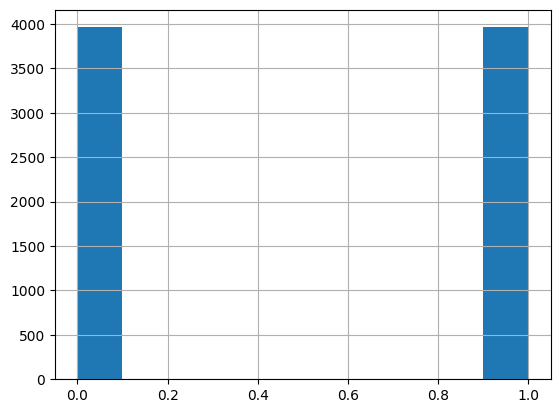

In [21]:
df_smote["Bankrupt?"].hist()

In [22]:
df_test.to_csv('datasets/data_test.csv', index=False)
df_smote.to_csv('datasets/data_smote.csv', index=False)

## 5.2 Under-sampling: RandomUnderSampler

In [23]:
under = RandomUnderSampler(sampling_strategy='not minority', random_state=42)

In [24]:
X_res, y_res = under.fit_resample(X_train, y_train)

In [25]:
df_smote_test = pd.concat([y_test, X_test], axis=1)

In [26]:
df_under = pd.concat([y_res, X_res], axis=1)
df_under.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
5834,0,-0.034344,-0.051025,0.020441,-0.454837,-0.454217,0.018845,0.024980,0.024008,0.004371,0.022975,1.700307,-0.750713,-0.091758,-0.151921,0.366411,0.040935,0.041652,0.040473,-0.094242,0.417503,-0.025697,-0.343142,-0.101601,-0.030539,-0.001221,0.010272,0.009949,-0.005827,0.901432,-0.013721,-0.053863,0.377053,-0.012111,-0.034237,-0.009569,-0.026226,0.591256,-0.591256,-0.116225,0.027049,0.284001,-0.341722,-0.090111,-0.184109,-0.599640,-0.045967,-0.038333,-0.661726,-0.407123,-0.370663,-0.017024,-0.238851,-0.038222,-0.706464,0.416039,0.000451,-0.098775,-0.020937,-0.072818,0.930633,-0.029423,-0.005196,-0.095887,0.673074,-0.182313,0.139084,-0.094979,0.109305,-0.001737,-0.811780,-0.423919,-0.641164,-0.006754,-0.841264,0.000905,-0.012111,0.673074,0.139084,-0.223393,-0.756862,-0.256374,0.481857,-0.487906,0.308405,0.016390,-0.049491,-0.040738,-0.455027,0.053062,0.054083,-0.043703,0.007083,-0.447422
5371,0,-0.187788,-0.033578,-0.148189,0.052924,0.054077,0.020080,0.018756,0.019298,-0.011175,0.017816,-0.616334,0.627217,-0.447860,-0.151921,0.524828,-0.481584,-0.479561,-0.480637,-0.125510,-0.624887,-0.025697,0.000748,-0.137923,-0.021615,0.019625,0.029450,0.029049,-0.002857,-1.630056,-0.013721,-0.014823,-0.562666,-0.012111,-0.034237,0.046291,-0.026226,1.273664,-1.273664,-0.116514,0.245502,-0.049430,0.003558,-0.127102,1.133280,0.467679,-0.045967,-0.038333,1.709162,

In [27]:
df_under.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, 5834 to 2041
Data columns (total 94 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                258 non-null    int64  
 1   ROA(C) before interest and depreciation before interest  258 non-null    float64
 2   ROA(A) before interest and % after tax                   258 non-null    float64
 3   ROA(B) before interest and depreciation after tax        258 non-null    float64
 4   Operating Gross Margin                                   258 non-null    float64
 5   Realized Sales Gross Margin                              258 non-null    float64
 6   Operating Profit Rate                                    258 non-null    float64
 7   Pre-tax net Interest Rate                                258 non-null    float64
 8   After-tax net Interest Rate    

<Axes: >

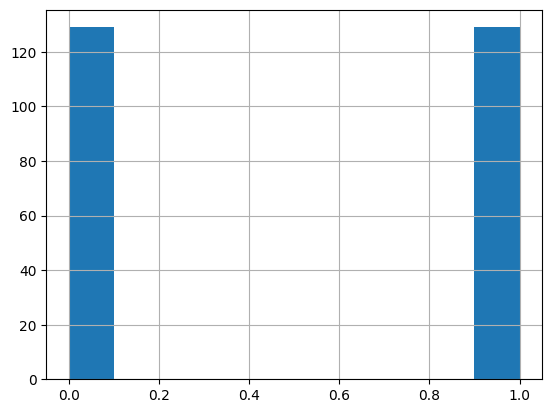

In [28]:
df_under["Bankrupt?"].hist()

In [29]:
df_under.to_csv('datasets/data_under.csv', index=False)

# 6. Validação e Visualização

Nessa seção, vamos apresentar como ficaram os dados depois das operações realizadas acima

Após a realização do balanceamento, procederemos à verificação do número de exemplos para cada classe, bem como à determinação da percentagem correspondente de cada classe no conjunto de dados.

Class Counts:
Bankrupt?
0    3962
1    3962
Name: count, dtype: int64

Class Percentages:
Bankrupt?
0    50.0
1    50.0
Name: proportion, dtype: float64


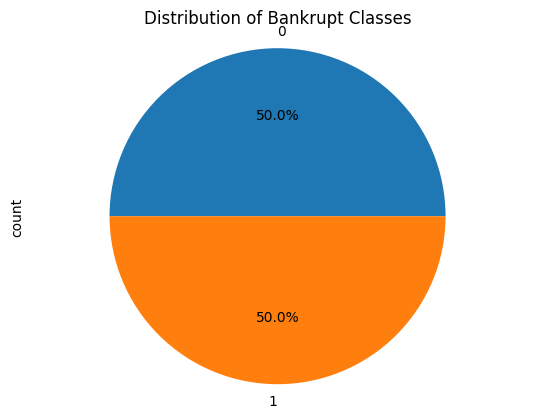

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df_smote['Bankrupt?'].value_counts()

class_percentages = df_smote['Bankrupt?'].value_counts(normalize=True) * 100


print("Class Counts:")
print(class_counts)
print("\nClass Percentages:")
print(class_percentages)

df_smote['Bankrupt?'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Bankrupt Classes')
plt.show()

Depois disso, o código produzirá um gráfico de dispersão para cada par de variáveis. A cor de cada ponto no gráfico representará a classe à qual pertence.

In [31]:
import seaborn as sns


fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(24, 8*num_rows))

for i, column in enumerate(df_smote.columns):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    scatter = axs[row, col].scatter(df_smote.iloc[:, i], df_smote.iloc[:, j], c=df_smote['Bankrupt?'], alpha=0.5)
    axs[row, col].set_xlabel(df_smote.columns[i])
    axs[row, col].set_ylabel(df_smote.columns[j])

    if col == num_plots_per_row - 1 or i == num_columns - 1:
        fig.legend(*elems)


NameError: name 'num_rows' is not defined

Por fim, vamos plotar a distribuição das variáveis contínuas. Com isso, podemos verificar se as variáveis estão distribuídas de forma normal.

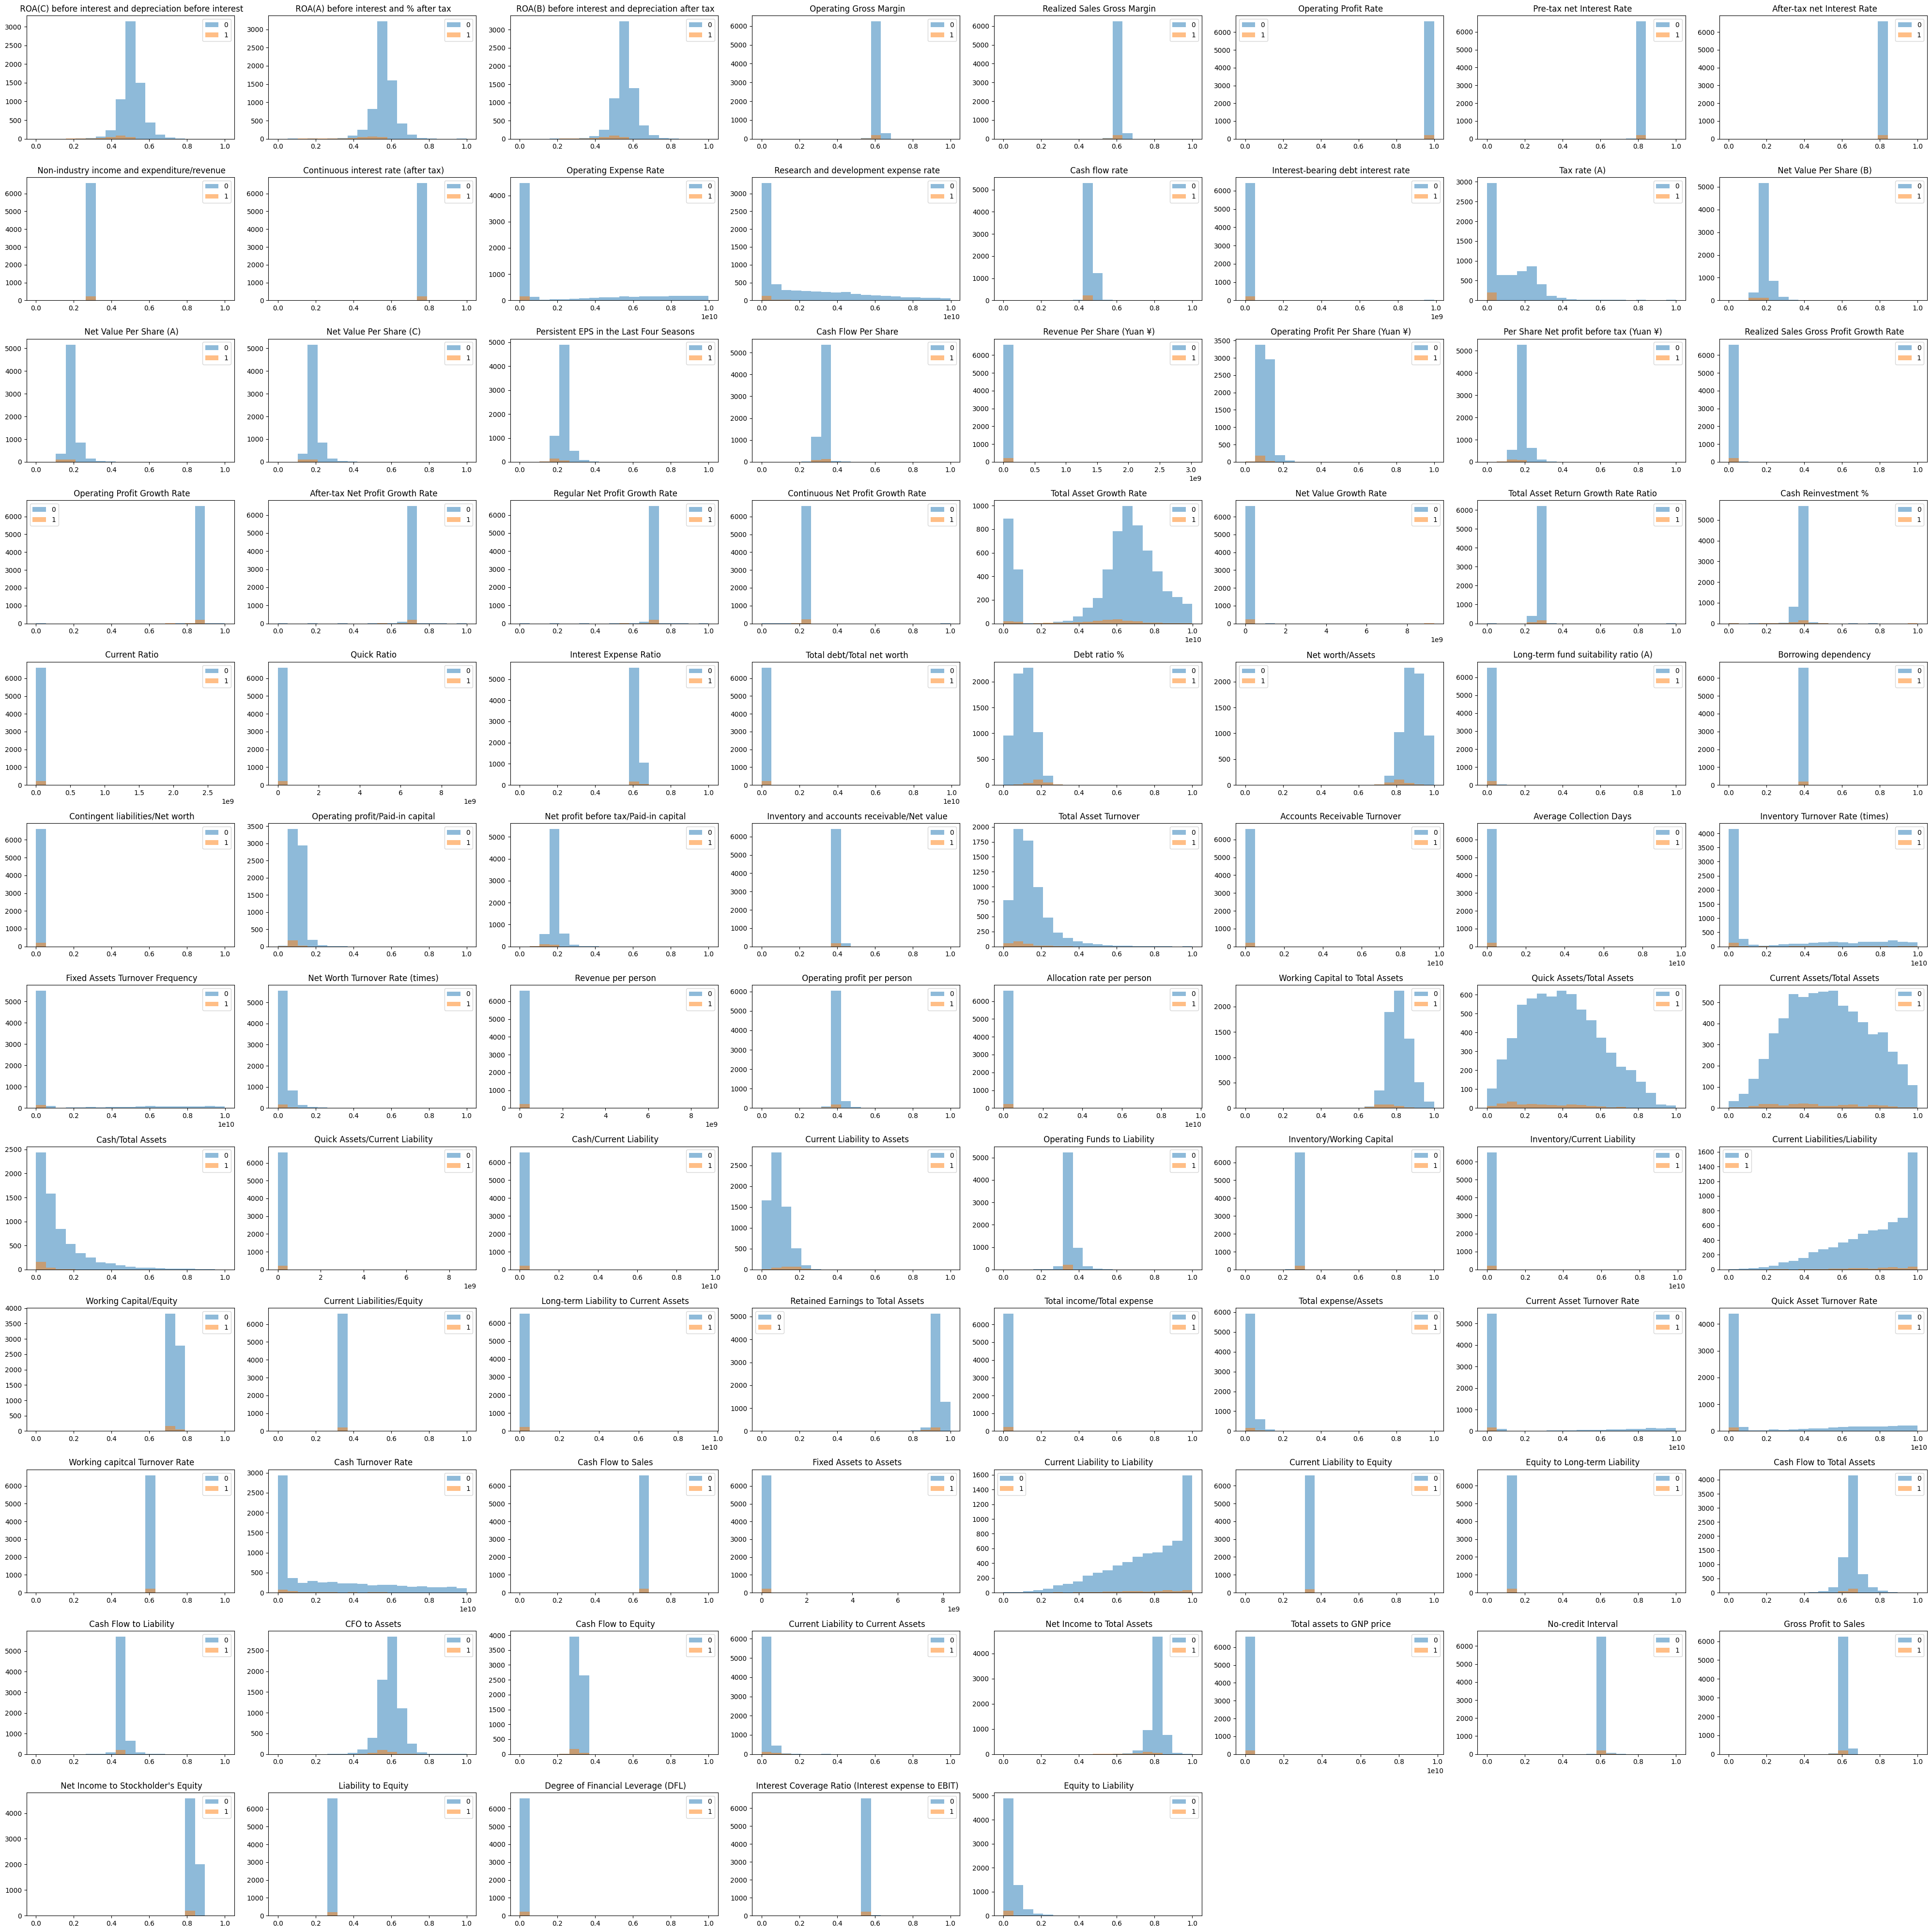

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(40, 40))

continuous_vars = [column for column in df.columns if column not in ['Bankrupt?', ' Net Income Flag', ' Liability-Assets Flag']]

num_vars = len(continuous_vars)
num_rows = (num_vars - 1) // 8 + 1
num_cols = min(num_vars, 8)

gs = gridspec.GridSpec(num_rows, num_cols)

for i, column in enumerate(continuous_vars):

    ax = fig.add_subplot(gs[i])

    values = df[column]

    bins = np.linspace(np.min(values), np.max(values), 20)

    for j in np.unique(df['Bankrupt?']):

        categ_values = values[df['Bankrupt?'] == j]

        ax.hist(categ_values, bins, alpha=0.5, label=j)
    ax.set_title(column)
    ax.legend()

plt.tight_layout()
plt.show()


Podemos observar que os valores das variáveis contínuas estão distribuídos de maneira normal em alguns casos, enquanto em outros apresentam uma distribuição assimétrica. Esta última condição pode representar um desafio para certos algoritmos de aprendizado de máquina, que podem encontrar dificuldades ao lidar com variáveis de distribuição assimétrica.